# Creación Mapa Adultos Mayores en Santiago

#### En el siguiente notebook se detalla como realizar un mapa urbano de Santiago con sus respectivas divisiones comunales.Se incluye un mapa de calor según la cantidad de habitantes mayores a 85 años (censo 2017). 
#### Para finalizar se ocupa la API de geolocalización de google para graficar la ubicación de los ELEAM autorizados por el SEREMI de la RM.

#### Gracias a los siguientes repositorios que use como guía

https://github.com/Mjrovai/Python4DS/blob/master/Streets_Santiago/notebooks/10_Streets_of_Santiago.ipynb

https://github.com/zorzalerrante/carto-en-python/blob/master/01%20-%20GeoPandas.ipynb
    
https://github.com/Mjrovai/UDD_Master_Data_Science/tree/master/Predict_Bicycle_traffic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

### Mapa urbano Santiago

In [136]:
urban_areas = gpd.read_file(r"C:\Users\joqui\Documents\Analisis agente topo\Areas_Urbanas", crs={'init': 'epsg:5361'})
urban_areas

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."
4,Concepción,Ciudad,82986.894378,3.454227e+07,"POLYGON ((133504.854 5919782.212, 136052.580 5..."
...,...,...,...,...,...
395,Puerto Aysen,Ciudad,5410.583898,1.123116e+06,"POLYGON ((210689.999 4964388.485, 210703.516 4..."
396,Cohaique,Ciudad,17677.879995,6.317038e+06,"POLYGON ((259973.620 4947324.020, 259774.760 4..."
397,Chile Chico,Pueblo,5641.875304,1.283623e+06,"POLYGON ((291972.658 4842628.158, 292039.346 4..."
398,Talcahuano,Ciudad,83548.165913,3.100519e+07,"POLYGON ((136052.580 5921780.429, 133504.854 5..."


In [137]:
urban_areas = urban_areas.to_crs({'init': 'epsg:4326'})

C:\Users\joqui\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


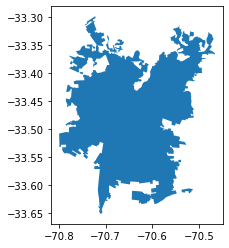

In [138]:
urban_areas[urban_areas.NOMBRE == 'Santiago'].plot()

### Mapa de Municipios

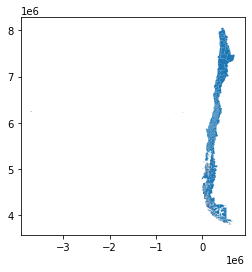

In [139]:
municipalities = gpd.read_file(r'C:\Users\joqui\Documents\Analisis agente topo\Areas_Comunas', crs={'init': 'epsg:5361'})
municipalities.plot()

In [140]:
municipalities.head()

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area,geometry
0,Región de La Araucanía,Malleco,Ercilla,170675.595438,48,14,9204,170675.595706,4.979025e+08,"POLYGON ((190393.220 5794527.366, 190474.419 5..."
1,Región de La Araucanía,Malleco,Lonquimay,346907.195437,49,14,9205,346907.195899,3.932854e+09,"POLYGON ((294265.593 5781748.870, 294327.827 5..."
2,Región de La Araucanía,Malleco,Los Sauces,169844.122286,48,14,9206,169844.122239,8.519730e+08,"POLYGON ((155495.103 5804765.810, 155518.319 5..."
3,Región de La Araucanía,Malleco,Lumaco,227705.219204,48,14,9207,227705.218806,1.112643e+09,"POLYGON ((159561.530 5778741.661, 159745.162 5..."
4,Región de La Araucanía,Malleco,Purén,137030.480474,48,14,9208,137030.480353,4.654760e+08,"POLYGON ((145272.593 5804247.707, 145347.984 5..."


In [141]:
municipalities = municipalities.to_crs("EPSG:4326")

#### Unión Mapa Urbano con Municipios

In [142]:
stgo_municipalities = gpd.sjoin(municipalities, urban_areas[urban_areas.NOMBRE == 'Santiago'], 
                                op='intersects')
stgo_municipalities.shape

<ipython-input-142-5d9dc685e3b0>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  stgo_municipalities = gpd.sjoin(municipalities, urban_areas[urban_areas.NOMBRE == 'Santiago'],


(36, 15)

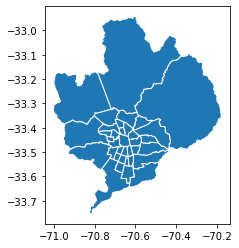

In [143]:
stgo_municipalities.plot(edgecolor='white')

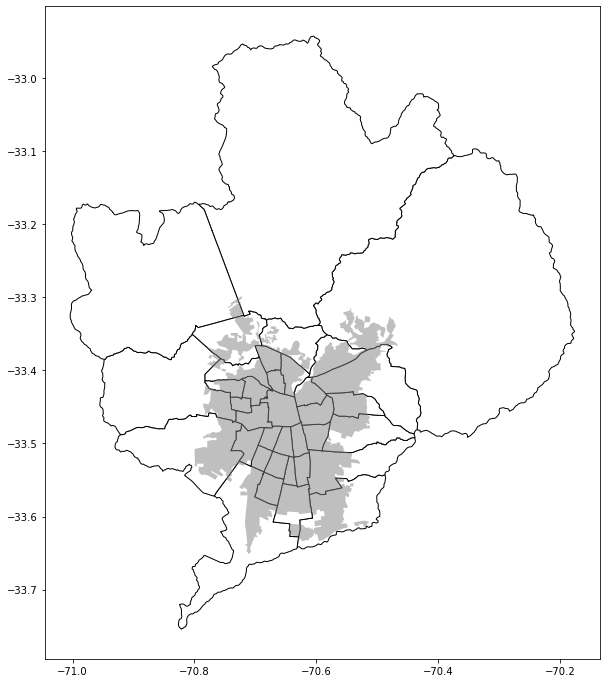

In [144]:
ax = stgo_municipalities.plot(figsize=(12,12), edgecolor='black', facecolor='white')
urban_areas[urban_areas.NOMBRE == 'Santiago'].plot(ax=ax, alpha=0.5, color='grey')

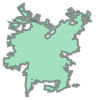

In [145]:
stgo = urban_areas[urban_areas.NOMBRE == 'Santiago'].geometry.values[0]
stgo

In [118]:
urban_areas = urban_areas.to_crs("EPSG:4326")

In [146]:
def intersection(municipality, urban_area):
    return municipality.intersection(urban_area)

stgo_municipalities.head().geometry.map(lambda x: intersection(x, stgo))

177    POLYGON ((-70.65730 -33.40479, -70.65729 -33.4...
178    POLYGON ((-70.55391 -33.54795, -70.55440 -33.5...
179    MULTIPOLYGON (((-70.48127 -33.36544, -70.48205...
180    POLYGON ((-70.69411 -33.50243, -70.69268 -33.5...
181    POLYGON ((-70.70559 -33.45716, -70.70621 -33.4...
Name: geometry, dtype: geometry

In [147]:
def urban_part(municipality):
    return intersection(municipality, stgo)

In [123]:
stgo_municipalities = stgo_municipalities.to_crs("EPSG:4326")

In [149]:
stgo_urban_municipalities = (stgo_municipalities.copy()
               .assign(geometry=lambda df_: df_.geometry.buffer(0).map(urban_part))
               .pipe(lambda df_: df_[~df_.is_empty].copy()))
stgo_urban_municipalities.shape

(36, 15)

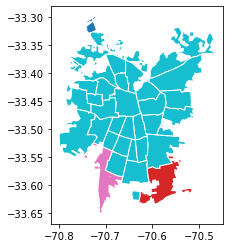

In [150]:
stgo_urban_municipalities.plot(column='NOM_PROV', edgecolor='white')
#plt.axis('equal')

In [151]:
stgo_urban_municipalities.head()

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area_left,geometry,index_right,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area_right
177,Región Metropolitana de Santiago,Santiago,Independencia,11488.695747,19,7,1310,11718.687086,7.514746e+06,"POLYGON ((-70.65730 -33.40479, -70.65729 -33.4...",385,Santiago,Ciudad,427491.444262,5.821041e+08
178,Región Metropolitana de Santiago,Santiago,La Florida,49696.426793,26,8,1311,49621.402175,7.103733e+07,"POLYGON ((-70.55391 -33.54795, -70.55440 -33.5...",385,Santiago,Ciudad,427491.444262,5.821041e+08
179,Región Metropolitana de Santiago,Santiago,Lo Barnechea,149539.074262,23,8,1311,149865.511039,1.024735e+09,"MULTIPOLYGON (((-70.48127 -33.36544, -70.48205...",385,Santiago,Ciudad,427491.444262,5.821041e+08
180,Región Metropolitana de Santiago,Santiago,Lo Espejo,11405.976039,28,8,1311,11389.045242,8.181655e+06,"POLYGON ((-70.69411 -33.50243, -70.69268 -33.5...",385,Santiago,Ciudad,427491.444262,5.821041e+08
181,Región Metropolitana de Santiago,Santiago,Lo Prado,10795.433316,18,7,1311,10691.672491,6.535088e+06,"POLYGON ((-70.70559 -33.45716, -70.70621 -33.4...",385,Santiago,Ciudad,427491.444262,5.821041e+08


In [152]:
stgo_urban_municipalities.NOM_COM.value_counts()

La Cisterna            1
Ñuñoa                  1
Independencia          1
La Reina               1
Quinta Normal          1
San Miguel             1
Peñalolén              1
Providencia            1
Lo Espejo              1
San Ramón              1
La Granja              1
Cerrillos              1
Las Condes             1
Colina                 1
San Bernardo           1
La Florida             1
Maipú                  1
Conchalí               1
Estación Central       1
Vitacura               1
Quilicura              1
Santiago               1
Lampa                  1
Pudahuel               1
Lo Barnechea           1
Huechuraba             1
El Bosque              1
Renca                  1
Pedro Aguirre Cerda    1
Recoleta               1
Macul                  1
Cerro Navia            1
La Pintana             1
Lo Prado               1
Puente Alto            1
San Joaquín            1
Name: NOM_COM, dtype: int64

### Mapa de municipios dentro de Santiago Urbano con población mayor a 85 años

In [205]:
df = pd.read_csv(r'C:\Users\joqui\Documents\Analisis agente topo\mayor85.csv',sep = ';')

In [206]:
df.head()

,NOM_COM,cantidad
0,La Cisterna,1906
1,Ñuñoa,5636
2,Independencia,1617
3,La Reina,2109
4,Quinta Normal,1959


In [158]:
df_pob = stgo_urban_municipalities.merge(df, on = 'NOM_COM', how = 'inner')

In [159]:
df_pob.head()

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area_left,geometry,index_right,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area_right,cantidad
0,Región Metropolitana de Santiago,Santiago,Independencia,11488.695747,19,7,1310,11718.687086,7.514746e+06,"POLYGON ((-70.65730 -33.40479, -70.65729 -33.4...",385,Santiago,Ciudad,427491.444262,5.821041e+08,1617
1,Región Metropolitana de Santiago,Santiago,La Florida,49696.426793,26,8,1311,49621.402175,7.103733e+07,"POLYGON ((-70.55391 -33.54795, -70.55440 -33.5...",385,Santiago,Ciudad,427491.444262,5.821041e+08,4536
2,Región Metropolitana de Santiago,Santiago,Lo Barnechea,149539.074262,23,8,1311,149865.511039,1.024735e+09,"MULTIPOLYGON (((-70.48127 -33.36544, -70.48205...",385,Santiago,Ciudad,427491.444262,5.821041e+08,933
3,Región Metropolitana de Santiago,Santiago,Lo Espejo,11405.976039,28,8,1311,11389.045242,8.181655e+06,"POLYGON ((-70.69411 -33.50243, -70.69268 -33.5...",385,Santiago,Ciudad,427491.444262,5.821041e+08,1675
4,Región Metropolitana de Santiago,Santiago,Lo Prado,10795.433316,18,7,1311,10691.672491,6.535088e+06,"POLYGON ((-70.70559 -33.45716, -70.70621 -33.4...",385,Santiago,Ciudad,427491.444262,5.821041e+08,1316


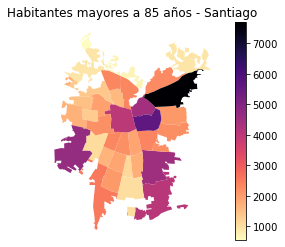

In [445]:
ax = df_pob.plot(column='cantidad', cmap='magma_r', k=5, legend=True)
plt.title("Habitantes mayores a 85 años - Santiago");
ax.set_axis_off()

### Búsqueda de geolocalización Hogares ELEAM con API de Google

In [202]:
pip install googlemaps


  Created wheel for googlemaps: filename=googlemaps-4.4.5-py3-none-any.whl size=37989 sha256=ea47b47e67818fbe4c925f974530436df85e092d859190c535be3e34e13a2f33
  Stored in directory: c:\users\joqui\appdata\local\pip\cache\wheels\ba\e0\b5\c1a0de4000d5c565052ded4d5e77bf185674de0f52aaa37d81
Successfully built googlemaps


In [264]:
direcciones = pd.read_csv(r'C:\Users\joqui\Documents\Analisis agente topo\Direcciones.csv',sep = ';')

In [265]:
direcciones.head()

,DIRECCION
0,SANTO DOMINGO 394 BUIN
1,MANUEL BULNES 165 BUIN
2,JOSE JOAQUIN PEREZ 460 BUIN
3,SERRANO 230 MAIPO BUIN
4,PARCELA 69-A EL RECURSO BUIN


In [266]:
import googlemaps
KEY = 'Enter key'
gmaps = googlemaps.Client(key=KEY)

In [267]:
def get_coordinates(address):
    city = '<Santiago>, <Chile>'
    geocode_result = gmaps.geocode(str(address) +' '+ city)
    if len(geocode_result) > 0:
        return list(geocode_result[0]['geometry']['location'].values())
    else:
        return [np.NaN, np.NaN]

In [268]:
coordinates = direcciones['DIRECCION'].apply(lambda x: pd.Series(get_coordinates(x), index=['LATITUDE', 'LONGITUDE']))
direcciones = pd.concat([direcciones[:], coordinates[:]], axis="columns")

In [269]:
direcciones.head()

,DIRECCION,LATITUDE,LONGITUDE
0,SANTO DOMINGO 394 BUIN,-33.741334,-70.742415
1,MANUEL BULNES 165 BUIN,-33.730595,-70.743870
2,JOSE JOAQUIN PEREZ 460 BUIN,-33.734666,-70.741620
3,SERRANO 230 MAIPO BUIN,-33.733801,-70.781396
4,PARCELA 69-A EL RECURSO BUIN,-33.693377,-70.707174


In [270]:
direcciones.to_csv('direcciones_lon_lat_2.csv', encoding='utf-8', index = False)

In [271]:
direcciones_2 = pd.read_csv(r'C:\Users\joqui\Documents\Analisis agente topo\direcciones_lon_lat_2.csv')

In [272]:
direcciones_2

,DIRECCION,LATITUDE,LONGITUDE
0,SANTO DOMINGO 394 BUIN,-33.741334,-70.742415
1,MANUEL BULNES 165 BUIN,-33.730595,-70.743870
2,JOSE JOAQUIN PEREZ 460 BUIN,-33.734666,-70.741620
3,SERRANO 230 MAIPO BUIN,-33.733801,-70.781396
4,PARCELA 69-A EL RECURSO BUIN,-33.693377,-70.707174
...,...,...,...
427,PADRE HURTADO 1880 VITACURA,-33.382346,-70.552360
428,PADRE HURTADO NORTE 2330 VITACURA,-33.378946,-70.556856
429,LAS HUALTATAS 5754 VITACURA,-33.395417,-70.574414
430,TUPUNGATO 9730 VITACURA,-33.385067,-70.540053


In [273]:
direcciones_geo = gpd.GeoDataFrame(
    direcciones_2, geometry=gpd.points_from_xy(direcciones_2.LONGITUDE, direcciones_2.LATITUDE))

In [298]:
direcciones_geo.head()

,DIRECCION,LATITUDE,LONGITUDE,geometry
0,SANTO DOMINGO 394 BUIN,-33.741334,-70.742415,POINT (-70.74242 -33.74133)
1,MANUEL BULNES 165 BUIN,-33.730595,-70.743870,POINT (-70.74387 -33.73060)
2,JOSE JOAQUIN PEREZ 460 BUIN,-33.734666,-70.741620,POINT (-70.74162 -33.73467)
3,SERRANO 230 MAIPO BUIN,-33.733801,-70.781396,POINT (-70.78140 -33.73380)
4,PARCELA 69-A EL RECURSO BUIN,-33.693377,-70.707174,POINT (-70.70717 -33.69338)


In [320]:
direcciones_geo_prueba4 = direcciones_geo[(direcciones_geo['LATITUDE'] >-33.65) & (direcciones_geo['LONGITUDE'] >-70.8) & (direcciones_geo['LATITUDE'] -33.3)

### Mapa Final población mayor a 85 años por comuna dentro de Santiago Urbano + Hogares

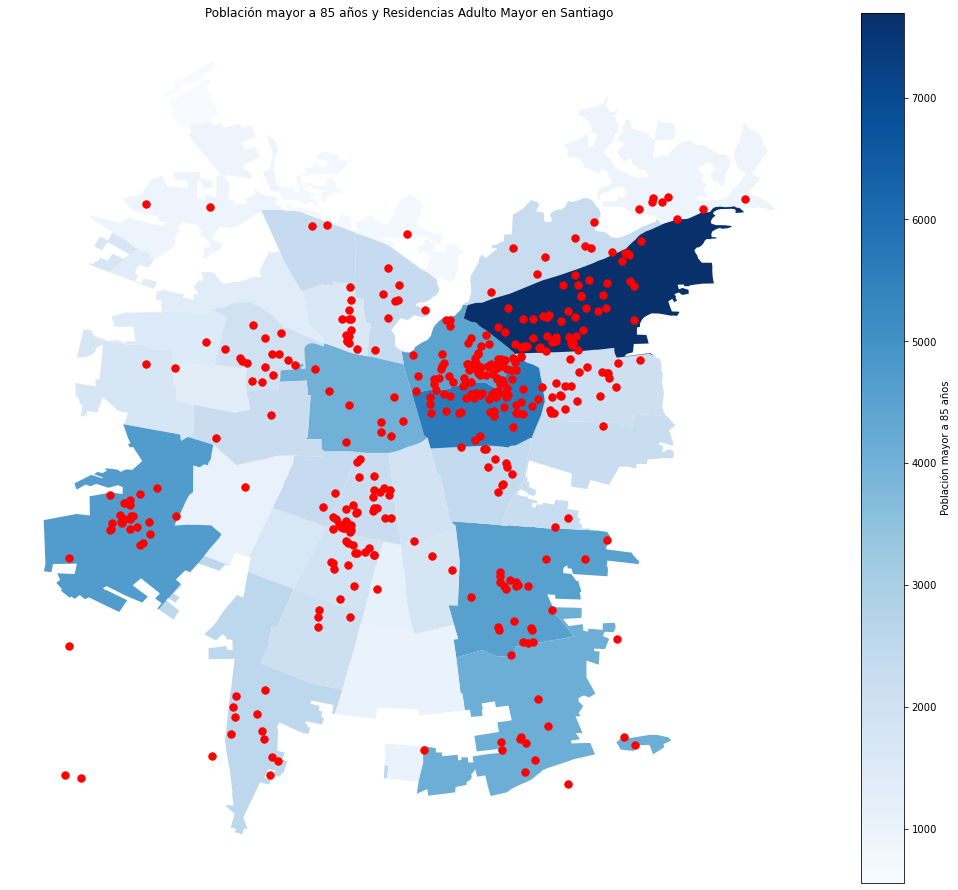

In [377]:
ax = df_pob.plot(figsize=(18, 16), column='cantidad', cmap='Blues', k=5, legend=True, legend_kwds={'label': "Población mayor a 85 años", 'orientation': "vertical"})
plt.title("Población mayor a 85 años y Residencias Adulto Mayor en Santiago");
plt.axis('off')
direcciones_geo_prueba4.plot(ax=ax, color='red', markersize=55)


### HEAT MAP difuso

In [427]:
def plot_point_distribution(**kwargs):
    #print(kwargs)
    ax = plt.gca()
    
    # context!
    context.plot(ax=ax, alpha=0.7, color='grey')
    
    color = kwargs.pop('color')
    geodf = kwargs.pop('data')
    bounds = kwargs.pop('bounds', None)

    sns.kdeplot(geodf.geometry.x, geodf.geometry.y, **kwargs)

    if bounds is not None:
        plt.xlim(bounds[:,0])
        plt.ylim(bounds[:,1])
    
    plt.axis('equal')
    plt.axis('off')

In [428]:
def plot_heat_map(data, label, context):
    g = sns.FacetGrid(data=data, 
                      size=6, 
                      dropna=False
                     );

    g.map_dataframe(plot_point_distribution, 
                    shade=True, 
                    alpha=0.7, 
                    cbar=True, 
                    cmap='magma_r', 
                    cbar_kws={'orientation': 'horizontal',
                              'label': label,
                              'fraction': 0.02,
                              'shrink': 0.35,
                              'pad': 0}
                   );

In [442]:
context = stgo_urban_municipalities

C:\Users\joqui\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


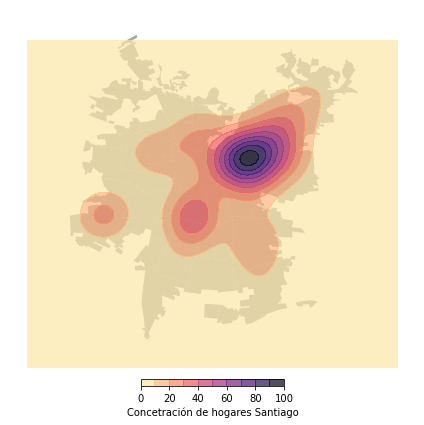

In [444]:
plot_heat_map(direcciones_geo_prueba4, 'Concetración de hogares Santiago', context)

### Boxplot camas por hogar

In [378]:
camas = pd.read_csv(r'C:\Users\joqui\Documents\Analisis agente topo\camas.csv')

In [379]:
camas.head()

,CAMAS
0,265
1,200
2,200
3,193
4,165


Text(0.5, 0, 'Camas por establecimiento')

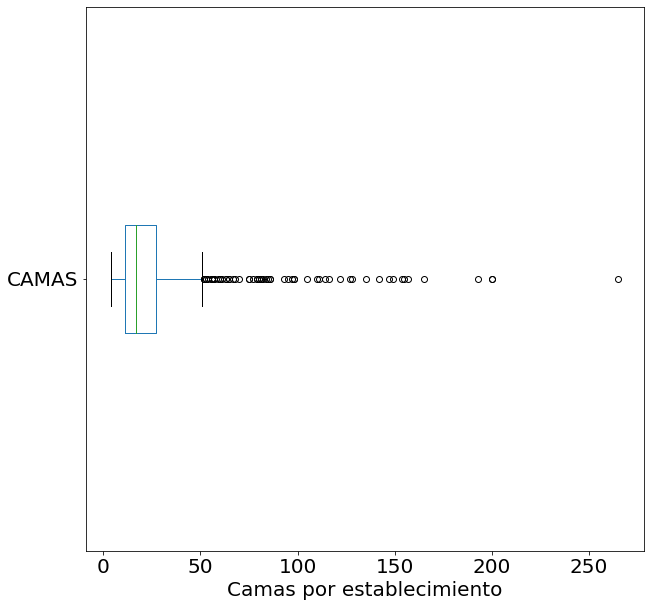

In [417]:
boxplot = camas.boxplot(grid=False, ax=None,vert=False,fontsize=20, figsize= (10, 10),widths = 0.2)
boxplot.set_xlabel('Camas por establecimiento',fontsize=20)


In [420]:
camas_100 = pd.read_csv(r'C:\Users\joqui\Documents\Analisis agente topo\Camas cada 100 hab.csv', sep=";")

In [421]:
camas_100.head()

,COMUNAS,CAMAS,ZONA
0,LO BARNECHEA,50,nororiente
1,INDEPENDENCIA,38,norte
2,SAN MIGUEL,30,sur
3,PROVIDENCIA,27,nororiente
4,LAS CONDES,25,nororiente
